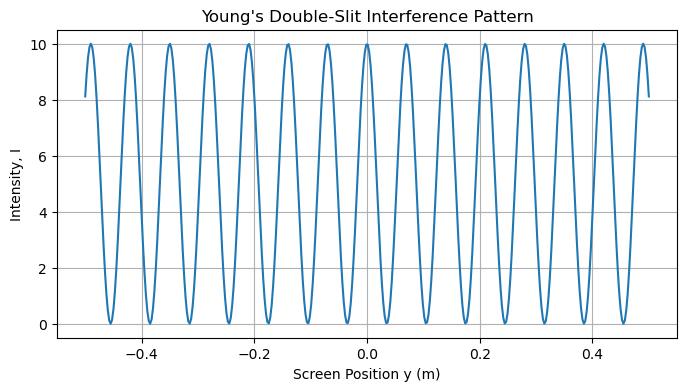

In [2]:
# YOUNG'S DOUBLE SLIT EXPERIMENT

import numpy as np
import matplotlib.pyplot as plt

# Constants
v_value = 4.3e14            # Frequency in Hz (not used directly here)
lambda_value = 7e-7         # Wavelength in meters
d = 1e-5                    # Slit separation in meters
D = 1                       # Distance to screen in meters
I0 = 10                     # Maximum intensity

# Define screen positions (using small-angle approximation, in meters)
y_values = np.linspace(-0.5, 0.5, 400)  # y values near the central maximum

# Compute the phase difference:
# For small angles, path difference Δx ≈ (d*y)/D, so phase difference φ = (2π/λ)*Δx.
phi = (2 * np.pi / lambda_value) * (d * y_values / D)

# Interference pattern (I = I0 cos^2(φ/2))
I_net_values = I0 * np.cos(phi/2)**2

# Plot the result
plt.figure(figsize=(8, 4))
plt.plot(y_values, I_net_values)
plt.xlabel("Screen Position y (m)")
plt.ylabel("Intensity, I")

plt.title("Young's Double-Slit Interference Pattern")

plt.grid(True)
plt.show()




# Interference of Waves

We begin with the expression for an infinitesimal electric field contribution:

\[
d\vec{E} = \frac{\vec{E}}{d} \cos(kz - \omega t) \, ds \, \hat{i}
\]

At \( t = 0 \):

\[
d\vec{E} = \frac{\vec{E}}{d} \cos(kz) \, ds \, \hat{i}
\]

Due to interfering sources:

\[
d\vec{E} = \frac{\vec{E}}{d} \cos(kz + k\Delta z) \, ds \, \hat{i}
\]

Since \( \Delta z = s \sin\theta \):

\[
d\vec{E} = \frac{\vec{E}}{d} \cos\Bigl(kz + k\bigl(s \sin\theta\bigr)\Bigr) \, ds \, \hat{i}
\]

Now, integrating over the source:

\[
\int d\vec{E} = \int_{0}^{d} \frac{\vec{E}}{d} \cos\Bigl(kz + ks \sin\theta\Bigr) \, ds \, \hat{i}
\]

The net electric field is then:

\[
\vec{E}_{\text{net}} = \frac{\vec{E}}{d} \cdot \frac{\sin\Bigl(kd \sin\theta\Bigr)}{kd \sin\theta}
\]

Alternatively, it is sometimes expressed as:

\[
\vec{E}_{\text{net}} = 2\, \frac{\vec{E}}{d} \cdot \frac{\sin\Bigl(\frac{kd \sin\theta}{2}\Bigr)}{kd \sin\theta} \, \cos\Bigl(kz + \frac{kd \sin\theta}{2}\Bigr)
\]

Letting

\[
\beta = \frac{kd \sin\theta}{2},
\]

we can write:

\[
\vec{E}_{\text{net}} = \left( \frac{\vec{E} \sin\beta}{\beta} \right) \cos(kz + \beta)
\]

Finally, the intensity is given by:

\[
I_{\text{net}} = I_0 \, \frac{\sin^2\beta}{\beta^2}
\]


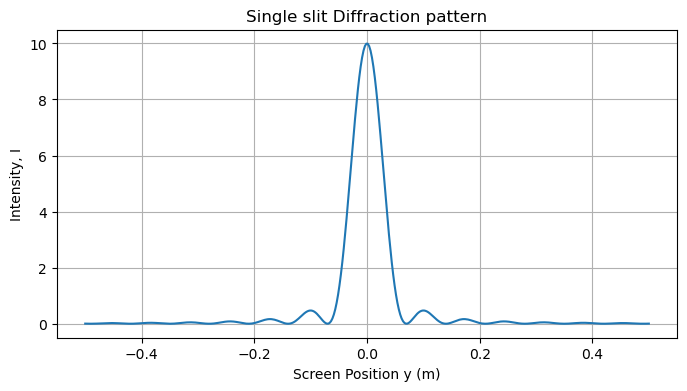

-0.5: 0.003738548975050296
-0.4974937343358396: 0.0021846649922922837
-0.4949874686716792: 0.000998404761686417
-0.4924812030075188: 0.0002527839094327217
-0.4899749373433584: 2.6164129702626496e-08
-0.487468671679198: 0.0002684938598832945
-0.4849624060150376: 0.0010607617359557095
-0.4824561403508772: 0.0023529545841628665
-0.4799498746867168: 0.004095408142901089
-0.4774436090225564: 0.0062146472568677886
-0.474937343358396: 0.008616608905233381
-0.4724310776942356: 0.011190973555316454
-0.4699248120300752: 0.013816409684198758
-0.4674185463659148: 0.016366486277448754
-0.4649122807017544: 0.018715969345846007
-0.462406015037594: 0.02074719317341938
-0.4598997493734336: 0.022356186672174892
-0.4573934837092732: 0.02345824070268534
-0.4548872180451128: 0.023992623584244623
-0.4523809523809524: 0.023926188530549647
-0.449874686716792: 0.023255666901875544
-0.4473684210526316: 0.02200850274439195
-0.4448621553884712: 0.020242154255969765
-0.4423558897243108: 0.018041863250523416
-0.439

In [7]:
k = 2*np.pi/(lambda_value)
beta = 1/2*(k*y_values*d/D)
y_values = np.linspace(-0.5, 0.5, 400)
I_net_values = I0*np.sin(beta)**2/(beta**2)


plt.figure(figsize=(8, 4))
plt.plot(y_values, I_net_values)
plt.xlabel("Screen Position y (m)")
plt.ylabel("Intensity, I")

plt.title("Single slit Diffraction pattern")

plt.grid(True)
plt.show()

for y, I in zip(y_values, I_net_values):
    print(f"{y}: {I}")




TypeError: where() got an unexpected keyword argument 'beta'

what if there were three slits in young's experiment